# Visualize difference of annotations between the splits

# Preamble

Set up paths and environment variables

In [1]:
import os
from matplotlib import pyplot as plt
import numpy as np
import json
import csv
import pandas as pd
import h5py
from tqdm import tqdm
from display_utils import show_all_rel_on_image

BASE_PATH = os.path.abspath("..")
outputs_path = os.path.join(BASE_PATH, 'dataset_generation/outputs')
vg80k_dict = json.load(open(os.path.join(outputs_path, 'VG80K/VG80K-SGG-dicts.json')))
vg80k_h5 = h5py.File(os.path.join(outputs_path, 'VG80K/VG80K-SGG.h5'), 'r')

vg150_h5 = h5py.File(os.path.join(outputs_path, 'VG150/VG-SGG-with-attri.h5'), 'r')
vg150_dict =  json.load(open(os.path.join(outputs_path, 'VG150/VG-SGG-dicts-with-attri.json')))

vg_150_currated = h5py.File(os.path.join(outputs_path, 'VG150_cur/VG-SGG-with-attri.h5'), 'r')
vg_150_currated_dict =  json.load(open(os.path.join(outputs_path, 'VG150_cur/VG-SGG-dicts-with-attri.json')))

vg_150_connected = h5py.File(os.path.join(outputs_path, 'VG150_con/VG-SGG-with-attri.h5'), 'r')
vg_150_connected_dict =  json.load(open(os.path.join(outputs_path, 'VG150_ccon/VG-SGG-dicts-with-attri.json')))

image_data = json.load(open(os.path.join(BASE_PATH, 'dataset_generation/inputs/image_data.json')))

vg_img_path = '../VisualGenome/VG_100K' # path to VG images

datasets = {'VG80K' : (vg80k_h5, vg80k_dict), 'VG150': (vg150_h5, vg150_dict), 'VG150-cur': (vg_150_currated, vg_150_currated_dict), 'VG150-con': (vg_150_connected, vg_150_connected_dict)}

to_test = ['VG150', 'VG150-cur']
datasets_to_test = {k: datasets[k] for k in to_test}

In [2]:
assert(len(vg80k_h5['img_to_first_rel']) == len(vg150_h5['img_to_first_rel']) == len(vg_150_currated['img_to_first_rel']) == len(vg_150_connected['img_to_first_rel']))

VG150
108073
Image ID: 2382880
Relations: 

giraffe has tail, tree behind fence, leaf behind fence, giraffe in front of fence, giraffe has tail, giraffe has tail, fence in front of giraffe, handle in fence, hair at tail, pole on fence, giraffe has leg, leaf of tree, giraffe has leg, pole between fence, giraffe has head, giraffe near giraffe, 


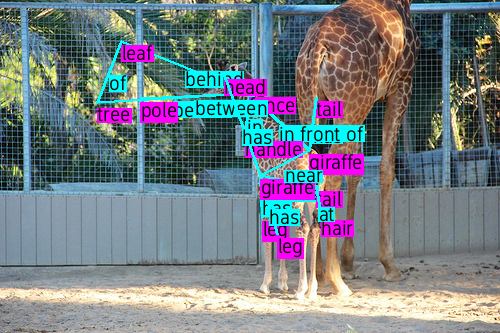

VG150-cur
108073
Image ID: 2382880
Relations: 

tree behind fence, leaf behind fence, giraffe in front of fence, giraffe in dirt, fence in front of giraffe, handle in fence, wall under fence, track in dirt, leaf of tree, leg on ground, giraffe has leg, giraffe near giraffe, 


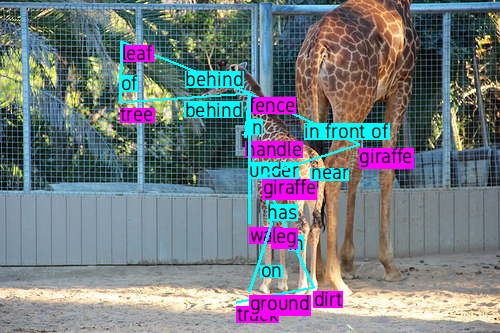

In [6]:
# get random image
img_idx = np.random.randint(0, len(vg_150_currated['img_to_first_rel']))

for dataset_name, (dataset_h5, dataset_dict) in datasets_to_test.items():
    print(dataset_name)
    print(len(dataset_h5['img_to_first_rel']))
    show_all_rel_on_image(image_data, dataset_h5, dataset_dict, img_idx, vg_img_path)